In [1]:
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math

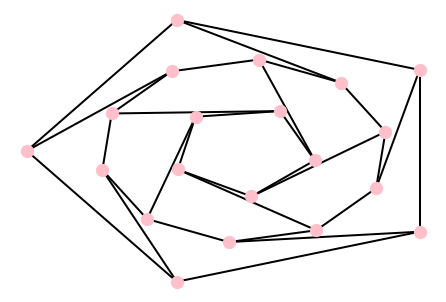

In [80]:
G = nx.dodecahedral_graph()
shells=[[2,3,4,5,6], [8,1,0,19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

### Problem 1. Measuring 'Vulnerability'
Given A large un-directed un-weighted connected graph $G$ with adjancency matrix A;
Find: A single number $V(G)$, reflecting the 'Vulnerability' of the whole graph.

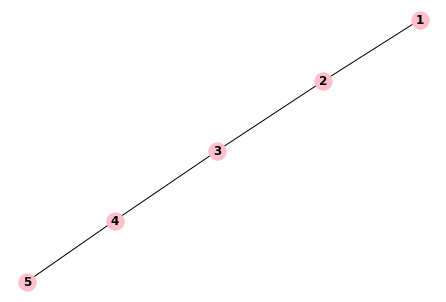

In [2]:
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5])
H.add_edges_from([(1,2),(2,3), (3,4),(4,5)])
nx.draw(H, with_labels=True, font_weight='bold', node_color='pink')

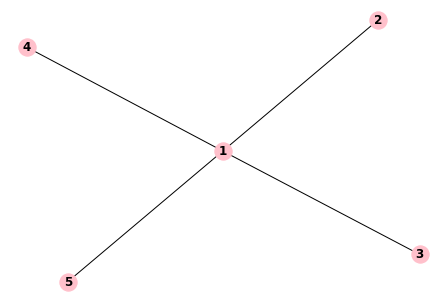

In [3]:
F = nx.Graph()
F.add_nodes_from([1,2,3,4,5])
F.add_edges_from([(1,2),(1,3), (1,4),(1,5)])
nx.draw(F, with_labels=True, font_weight='bold', node_color='pink')

In [4]:
A = nx.adjacency_matrix(H)
print(A.todense())

[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


In [81]:
w, v = LA.eig(A.todense())

In [85]:
v

matrix([[ 7.07106781e-01,  7.07106781e-01, -5.63245914e-34,
         -5.63245914e-34, -5.63245914e-34],
        [ 3.53553391e-01, -3.53553391e-01, -5.00000000e-01,
         -5.00000000e-01, -5.00000000e-01],
        [ 3.53553391e-01, -3.53553391e-01,  8.33333333e-01,
         -1.66666667e-01, -1.66666667e-01],
        [ 3.53553391e-01, -3.53553391e-01, -1.66666667e-01,
          8.33333333e-01, -1.66666667e-01],
        [ 3.53553391e-01, -3.53553391e-01, -1.66666667e-01,
         -1.66666667e-01,  8.33333333e-01]])

In [111]:
B= nx.adjacency_matrix(F)
print(B.todense())
w,v=LA.eig(B.todense())
w[0] #primer eigenvalor

[[0 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


2.0

### Problem 2. Proposed 'Shield-Value' Score
Given: A subset $S$ with $k$ nodes in a large un-directed un-weighted connected graph $G$ with adjacency matrix $A$.
Find: A single number $Sv(S)$ reflecting the 'Shield-value' of these $k$ nodes (that is, the benefit of their removal/ immunization to the vulnerability of the graph).

Se propone una aproximación a la caída del valor propio, $$Sv(S) = \sum_{i\in S} 2\lambda u(i)^2 - \sum_{i,j \in S} A(i,j)u(i)u(j)$$

##### Notación, 
$A(i,j)$ es el elemento del renglón $i$ y la columna $j$ de la matriz $A$.

$u$ es el vector propio, y $u(i)$ es la entrada $i$ del vector.

$\lambda$ es el primer valor propio de la matriz $A$.

##### Ejemplo.

In [2]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
G.add_edges_from([(0,1), (0,2), (0,3),(0,14), (14,12),(12,15), (12,13),(13,4), (4,6),(4,7),(4,5), (15,8), (8,9),
                  (8,11), (8,10)])

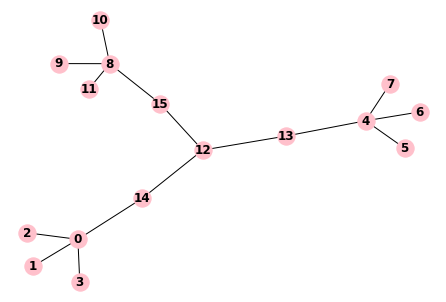

In [3]:
nx.draw(G, with_labels=True, font_weight='bold', node_color='pink')

Calculo de la matriz de adyacencia y su primer valor propio.

In [85]:
A = nx.adjacency_matrix(G)
A = A.todense()
w1, v1 = LA.eig(A)
lam = w1[0] 
u=v1[:,0]

In [302]:
#Se define el grafo y su matriz de adyacencia y el valor lambda

In [5]:
def potencia(c):
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]

In [6]:
def shield_value_score(S):
    global G, A, lam, u
    x = 0
    y = 0
    for i in S:
        x = x + 2*lam*(u[i]**2)
        for j in S:
            y =A[i,j]*u[i]*u[j]
    m = x - y
    return(m)

In [7]:
m = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
k=2

In [8]:
vs = math.inf

In [9]:
for S in potencia(m):
    if(len(S)==k):
        if (shield_value_score(S)<vs):
            vs = shield_value_score(S)
            nodo = S 

#### Problem 3

Encontrar $k$ nodos con el mejor 'shield-value'


Given: A large un-directed un-weighted connected graph $G$

Find: A subset $S$ de $k$ nodes with the highest 'Shield-value' score among all ${n \choose k}$ possible subsets.

In [116]:
def NetShield(A,k):
    w1, v1 = LA.eig(A)
    lam = w1[0] 
    u= v1[:,0]
    if k > len(G.nodes):
        return('Error: k should be at must n')
    S=[]
    v=[]
    B=[]
    b=[]
    for j in range(len(G.nodes)):
        v.append((2*lam - A[j,j])*(u[j]**2))
    
    for x in range(k):
        B = A[:,S]
        b = B*u[S]
        score=[]
        for j in range(len(G.nodes)):
            if j in S:
                score.append(-1)
            else: 
                score.append(v[j] - 2*b[j]*u[j])
        S.append(score.index(max(score)))
    
    return(S)

In [117]:
A = nx.adjacency_matrix(G)
A = A.todense()

In [120]:
NetShield(A,2)

[6, 7]

In [122]:
shield_value_score(NetShield(A,2))

matrix([[-0.18490007]])

In [137]:
def NetShield_plus(A,k,b):
    w1, v1 = LA.eig(A)
    lam = w1[0] 
    u= v1[:,0]
    S_1=[]
    t = math.floor(k/b)
    
    for j in range(t-1):
        S_1 = NetShield(A,b)
        S.extend(S_1)
        for g in S_1:
            A =np.delete(A,g,axis=0)
            A =np.delete(A,g,axis=1)
    
    if k > t*b:
        S_1 = NetShield(A,k-t*b)
        S.extend(S_1)
    
    return(S)    

In [138]:
A = nx.adjacency_matrix(G)
A = A.todense()
w1, v1 = LA.eig(A)
lam = w1[0] 
u=v1[:,0]
S = []

In [51]:
for g in S_1:
    A=np.delete(A,g,axis=0)
    A=np.delete(A,g,axis=1)